## Import the necessary packages

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [2]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [3]:
image_gen.flow_from_directory('dataset/')

Found 50 images belonging to 2 classes.


In [4]:
# initialize the initial learning rate, number of epochs to train for,and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

In [5]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) #cause need only 1 o/p
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [16]:
batch_Size=16
train_image_gen = image_gen.flow_from_directory('dataset/',
                                               target_size=(150,150,3)[:2],
                                               batch_size=batch_Size,
                                               class_mode='binary')

batch_Size=16
test_image_gen = image_gen.flow_from_directory('test/',
                                               target_size=(150,150,3)[:2],
                                               batch_size=batch_Size,
                                               class_mode='binary')

Found 50 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1}

In [19]:
result =model.fit_generator(train_image_gen,epochs=5,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Epoch 1/5
150/150 [==============================] - 263s 2s/step - loss: 0.3562 - acc: 0.8617 - val_loss: 0.2678 - val_acc: 0.8750
Epoch 2/5
150/150 [==============================] - 189s 1s/step - loss: 0.2303 - acc: 0.9091 - val_loss: 0.1062 - val_acc: 0.9667
Epoch 3/5
150/150 [==============================] - 208s 1s/step - loss: 0.1812 - acc: 0.9288 - val_loss: 0.1462 - val_acc: 0.9417
Epoch 4/5
150/150 [==============================] - 210s 1s/step - loss: 0.1429 - acc: 0.9454 - val_loss: 0.1843 - val_acc: 0.9083
Epoch 5/5
150/150 [==============================] - 182s 1s/step - loss: 0.2154 - acc: 0.9309 - val_loss: 0.2552 - val_acc: 0.8833


No handles with labels found to put in legend.


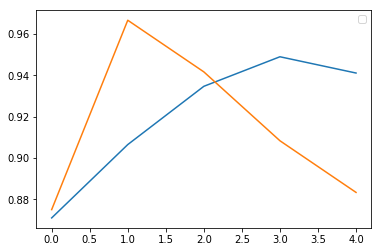

In [21]:
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.legend()
plt.show()